# Contours

### What are contours?

                        Contours is a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.
![Contours](contours.jpg)

#### Finding Contours in an Image

In [50]:
import cv2
from matplotlib import pyplot as plt

img=cv2.imread("Shape2.png",1)
gimg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(gimg,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

img2=cv2.imread("Shape.png")
gimg2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret2,thresh2=cv2.threshold(gimg2,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [51]:
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
image, contours2, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

There are three arguments in cv2.findContours() function, first one is source image, second is contour retrieval mode, third is contour approximation method. And it outputs the image, contours and hierarchy. contours is a Python list of all the contours in the image. Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.
Contour Approximation Method
If you pass cv2.CHAIN_APPROX_NONE, all the boundary points are stored. But actually do we need all the points? For eg, you found the contour of a straight line. Do you need all the points on the line to represent that line? No, we need just two end points of that line. This is what cv2.CHAIN_APPROX_SIMPLE does. It removes all redundant points and compresses the contour, thereby saving memory.

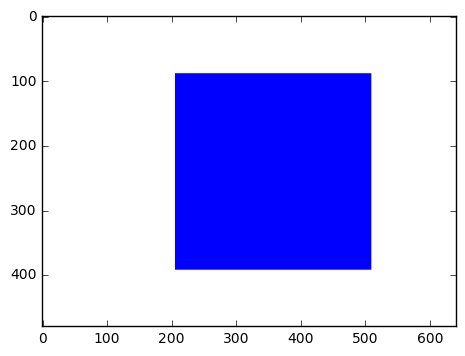

Chain Approx Simple No of Points: 1208
[array([[[205,  90]],

       [[205,  91]],

       [[205,  92]],

       ..., 
       [[208,  90]],

       [[207,  90]],

       [[206,  90]]], dtype=int32)]
Chain Approx None No of Points: 4
[array([[[205,  90]],

       [[205, 392]],

       [[507, 392]],

       [[507,  90]]], dtype=int32)]


In [52]:
plt.imshow(img)
plt.show()
print("Chain Approx Simple No of Points:",len(contours[0]))
print(contours)
print("Chain Approx None No of Points:",len(contours2[0]))
print(contours2)

#### Drawing Contours

In [53]:
image, contours, hierarchy = cv2.findContours(thresh2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
c = cv2.drawContours(img2, contours, -1, (0,0,0), 3) #Drawing Contour with black color

Its first argument is source image, second argument is the contours which should be passed as a Python list, third argument is index of contours (useful when drawing individual contour. To draw all contours, pass -1) and remaining arguments are color, thickness etc.

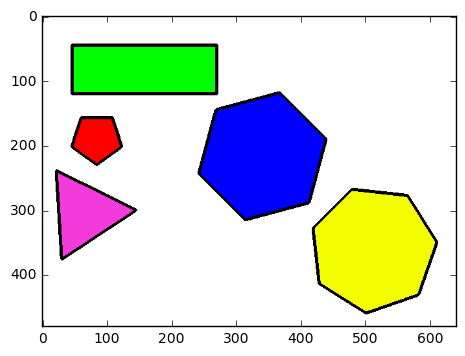

In [54]:
plt.imshow(c)
plt.show()

#### Contour Features

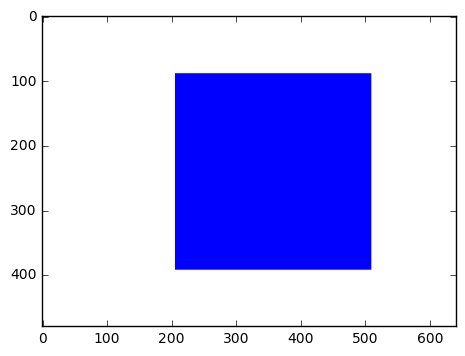

Centroid: 356 241 Area: 91204.0  Perimeter: 1208.0


In [55]:
image,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
#Moments
M = cv2.moments(cnt)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
#Area
area = cv2.contourArea(cnt)
#perimeter
perimeter = cv2.arcLength(cnt,True)
plt.imshow(img)
plt.show()
print('Centroid:',cx,cy, 'Area:',area,' Perimeter:',perimeter)

#### Contour Approximation
            It approximates a contour shape to another shape with less number of vertices depending upon the precision we specify.

epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

             Suppose you are trying to find a square in an image, but due to some problems in the image, you didn’t get a perfect square, but a “bad shape” (As shown in first image below). Now you can use this function to approximate the shape. In this, second argument is called epsilon, which is maximum distance from contour to approximated contour. It is an accuracy parameter. A wise selection of epsilon is needed to get the correct output.
 
            Below, in second image, green line shows the approximated curve for epsilon = 10% of arc length. Third image shows the same for epsilon = 1% of the arc length. Third argument specifies whether curve is closed or not.
           
![Contours](approx.jpg)


###### To detect polygons of 6 sides
![Contours](Shape.png)

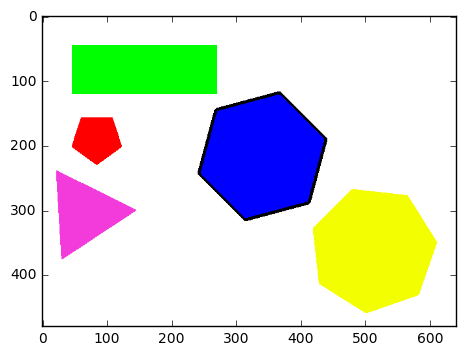

In [56]:
img2=cv2.imread("Shape.png")
gimg2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret2,thresh2=cv2.threshold(gimg2,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

image, contours, hierarchy = cv2.findContours(thresh2,1,2)

for i in contours:
	approx = cv2.approxPolyDP(i,0.01*cv2.arcLength(i,True),True)
	if len(approx)==6:
		img2= cv2.drawContours(img2, [i], 0, (0,0,0), 3)
plt.imshow(img2)
plt.show()

###  Convex Hull
                Convex Hull will look similar to contour approximation, but it is not (Both may provide same results in some cases). Here, cv2.convexHull() function checks a curve for convexity defects and corrects it. Generally speaking, convex curves are the curves which are always bulged out, or at-least flat. And if it is bulged inside, it is called convexity defects. For example, check the below image of hand. Red line shows the convex hull of hand. The double-sided arrow marks shows the convexity defects, which are the local maximum deviations of hull from contours.
![Contours](convexitydefects.jpg)


##### Task: Use Convex Hull to recognise Hand Gestures

##### Reference
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_table_of_contents_contours/py_table_of_contents_contours.html#table-of-content-contours